PDF OF SENTINEL DATA

.urban area

In [5]:
from pyproj import Transformer

# WGS84 -> UTM Zone 34N
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32634", always_xy=True)
x, y = transformer.transform(22.0047, 50.0379)
print(x, y)


571946.6490875528 5543328.126608744


Using tile: S2C_MSIL2A_20250920T094041_N0511_R036_T34UEA_20250920T130302.SAFE\GRANULE\L2A_T34UEA_A005440_20250920T094522\IMG_DATA\R10m\T34UEA_20250920T094041_B04_10m.jp2


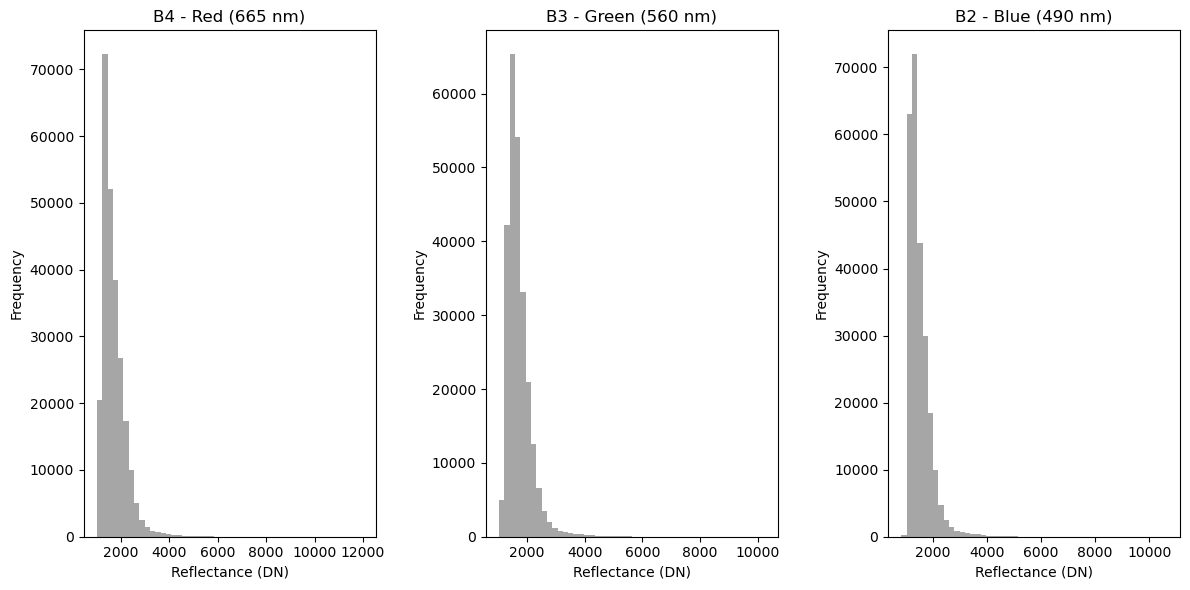

In [ ]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import from_bounds, Window
from pyproj import Transformer, CRS


safe_root = r"S2C_MSIL2A_20250920T094041_N0511_R036_T34UEA_20250920T130302.SAFE"
lon, lat  = 571946.6490875528, 5543328.126608744  # Rzeszów center
dx, dy    = 2500, 2500


def find_rgb_triplets(safe_root):
    b04s = glob.glob(os.path.join(safe_root, "GRANULE", "*", "IMG_DATA", "R10m", "*_B04_10m.jp2"))
    trips = []
    for b4 in b04s:
        base = os.path.basename(b4).replace("B04","{band}")
        folder = os.path.dirname(b4)
        b03 = os.path.join(folder, base.format(band="B03"))
        b02 = os.path.join(folder, base.format(band="B02"))
        if os.path.exists(b03) and os.path.exists(b02):
            trips.append((b4, b03, b02))
    return trips

triplets = find_rgb_triplets(safe_root)
if not triplets:
    raise RuntimeError("No RGB triplets found")


def point_in_bounds(x, y, bounds):
    xmin, ymin, xmax, ymax = bounds
    return (xmin <= x <= xmax) and (ymin <= y <= ymax)

best = None
best_dist = float("inf")
for b4, b3, b2 in triplets:
    with rasterio.open(b4) as src:
        
        try:
            crs_raster = src.crs or "EPSG:4326"
            transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)

            
            x, y = transformer.transform(lon, lat)

            transform = src.transform
        except Exception:
            
            continue

        
        if point_in_bounds(x, y, src.bounds):
            best = (b4, b3, b2, x, y, src.transform, src.width, src.height, src.bounds, src.crs)
            break

       
        cx = (src.bounds.left + src.bounds.right) / 2
        cy = (src.bounds.top + src.bounds.bottom) / 2
        d = ((x - cx) ** 2 + (y - cy) ** 2) ** 0.5
        if d < best_dist:
            best_dist = d
            best = (b4, b3, b2, x, y, src.transform, src.width, src.height, src.bounds, src.crs)

if best is None:
    raise RuntimeError("No suitable tile found (could not interpret CRS for any tile)")

b4_path, b3_path, b2_path, x, y, transform, W, H, bounds, crs = best
print("Using tile:", b4_path)


xmin, ymin, xmax, ymax = x - dx, y - dy, x + dx, y + dy
win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
win = Window(int(round(win.col_off)), int(round(win.row_off)),
             int(round(win.width)), int(round(win.height)))


with rasterio.open(b4_path) as r: b4 = r.read(1, window=win)
with rasterio.open(b3_path) as g: b3 = g.read(1, window=win)
with rasterio.open(b2_path) as b: b2 = b.read(1, window=win)


bands = [b4, b3, b2]
names = ["B4 - Red (665 nm)", "B3 - Green (560 nm)", "B2 - Blue (490 nm)"]


plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
    plt.xlabel("Reflectance (DN)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


.natural area

In [9]:
from pyproj import Transformer

# WGS84 -> UTM Zone 34N
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32634", always_xy=True)
x, y = transformer.transform(22.4268, 49.5729) # podcarpathian forests
print(x, y)

603155.9007240233 5492123.359598285


Using tile: S2C_MSIL2A_20250920T094041_N0511_R036_T34UEA_20250920T130302.SAFE\GRANULE\L2A_T34UEA_A005440_20250920T094522\IMG_DATA\R10m\T34UEA_20250920T094041_B04_10m.jp2


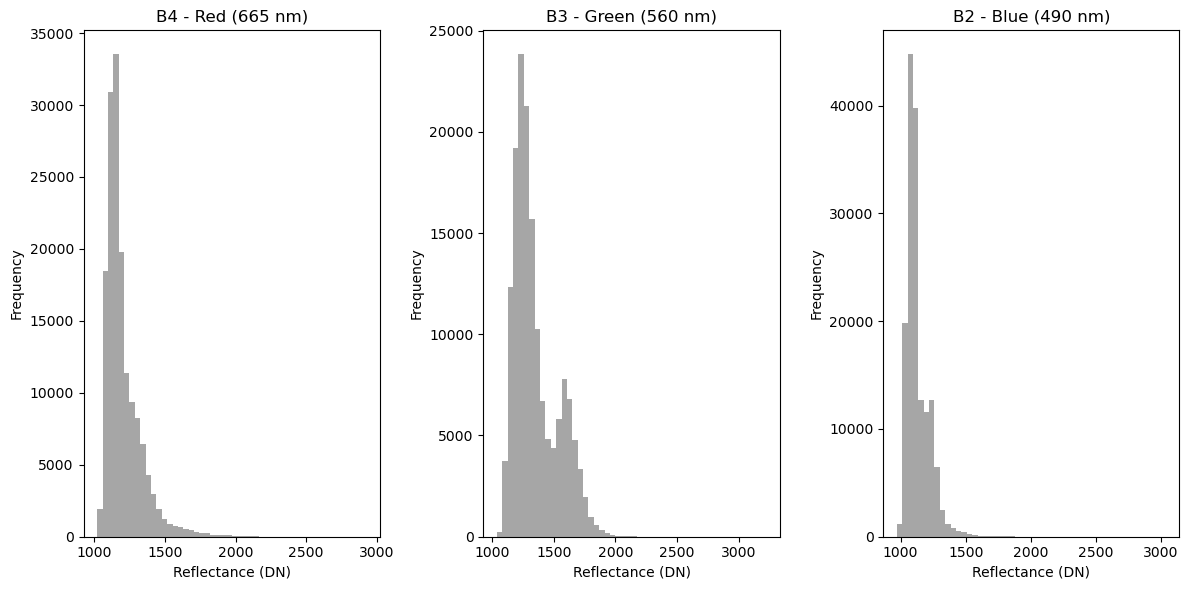

In [ ]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import from_bounds, Window
from pyproj import Transformer, CRS


safe_root = r"S2C_MSIL2A_20250920T094041_N0511_R036_T34UEA_20250920T130302.SAFE"
lon, lat  = 603155.9007240233, 5492123.359598285  # podcarpathian forests
dx, dy    = 2000, 2000 


def find_rgb_triplets(safe_root):
    b04s = glob.glob(os.path.join(safe_root, "GRANULE", "*", "IMG_DATA", "R10m", "*_B04_10m.jp2"))
    trips = []
    for b4 in b04s:
        base = os.path.basename(b4).replace("B04","{band}")
        folder = os.path.dirname(b4)
        b03 = os.path.join(folder, base.format(band="B03"))
        b02 = os.path.join(folder, base.format(band="B02"))
        if os.path.exists(b03) and os.path.exists(b02):
            trips.append((b4, b03, b02))
    return trips

triplets = find_rgb_triplets(safe_root)
if not triplets:
    raise RuntimeError("No RGB triplets found")


def point_in_bounds(x, y, bounds):
    xmin, ymin, xmax, ymax = bounds
    return (xmin <= x <= xmax) and (ymin <= y <= ymax)

best = None
best_dist = float("inf")
for b4, b3, b2 in triplets:
    with rasterio.open(b4) as src:
        
        try:
            crs_raster = src.crs or "EPSG:4326"
            transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)

            
            x, y = transformer.transform(lon, lat)

            transform = src.transform
        except Exception:
           
            continue

        
        if point_in_bounds(x, y, src.bounds):
            best = (b4, b3, b2, x, y, src.transform, src.width, src.height, src.bounds, src.crs)
            break

       
        cx = (src.bounds.left + src.bounds.right) / 2
        cy = (src.bounds.top + src.bounds.bottom) / 2
        d = ((x - cx) ** 2 + (y - cy) ** 2) ** 0.5
        if d < best_dist:
            best_dist = d
            best = (b4, b3, b2, x, y, src.transform, src.width, src.height, src.bounds, src.crs)

if best is None:
    raise RuntimeError("No suitable tile found (could not interpret CRS for any tile)")

b4_path, b3_path, b2_path, x, y, transform, W, H, bounds, crs = best
print("Using tile:", b4_path)


xmin, ymin, xmax, ymax = x - dx, y - dy, x + dx, y + dy
win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
win = Window(int(round(win.col_off)), int(round(win.row_off)),
             int(round(win.width)), int(round(win.height)))


with rasterio.open(b4_path) as r: b4 = r.read(1, window=win)
with rasterio.open(b3_path) as g: b3 = g.read(1, window=win)
with rasterio.open(b2_path) as b: b2 = b.read(1, window=win)


bands = [b4, b3, b2]
names = ["B4 - Red (665 nm)", "B3 - Green (560 nm)", "B2 - Blue (490 nm)"]


plt.figure(figsize=(12, 6))
for i, (band, name) in enumerate(zip(bands, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(band.flatten(), bins=50, color="gray", alpha=0.7)
    plt.title(name)
    plt.xlabel("Reflectance (DN)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The histograms of the Sentinel 2 bands show skewed distributions, typically concentrated toward lower Digital Number (DN) values.
This is expected because many pixels correspond to vegetation, soil, or shadowed areas with moderate reflectance.

Each band has a slightly different distribution:

Blue (B2) and Green (B3) bands show higher spread in natural regions. Red (B4) band often peaks at lower DN values due to strong absorption in vegetation.
In urban areas, histograms of chosen bands are much more similar. 

The histograms confirm that Sentinel-2 data is not uniform — most natural surfaces have reflectance values clustered within specific DN ranges.
The plots (PDFs) help in identifying brightness/contrast issues and determining suitable normalization.

Sentinel 1 - urban area

C:\Users\Klaudia\AppData\Local\Temp\ipykernel_19348\2083431956.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)


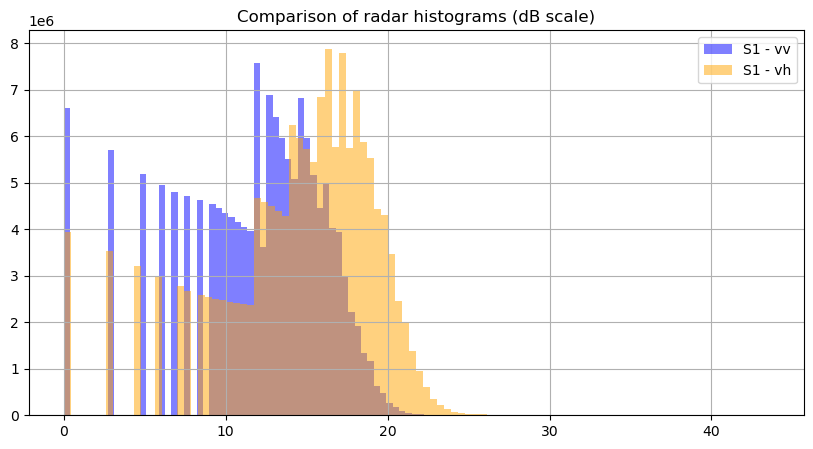

In [14]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

# Parameters of the area (same as before)
lon, lat  = 22.0047, 50.0379   # podkarpackie lasy
dx, dy    = 2000, 2000

s1_file_1 = r"C:\Users\Klaudia\Desktop\mlfsa\s1c-iw3-slc-vh-20251020t162601-20251020t162626-004648-009307-003.tiff"   
s1_file_2 = r"C:\Users\Klaudia\Desktop\mlfsa\s1c-iw3-slc-vv-20251020t162601-20251020t162626-004648-009307-006.tiff"   

def read_window(path, lon, lat, dx, dy):
    with rasterio.open(path) as src:
        
        crs_raster = src.crs or "EPSG:4326"
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)

        
        x, y = transformer.transform(lon, lat)

        transform = src.transform
        W, H = src.width, src.height

        
        if abs(transform.a) < 0.001: 
            dx_deg = dx / 111320
            dy_deg = dy / 111320
        else:
            dx_deg = dx
            dy_deg = dy

        xmin, ymin, xmax, ymax = x - dx_deg, y - dy_deg, x + dx_deg, y + dy_deg

       
        try:
            win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
        except Exception:
           
            rleft, rbottom, rright, rtop = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
            xmin = max(xmin, rleft)
            xmax = min(xmax, rright)
            ymin = max(ymin, rbottom)
            ymax = min(ymax, rtop)
            if xmin >= xmax or ymin >= ymax:
                
                win = Window(0, 0, W, H)
            else:
                win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)

       
        col_off = int(np.floor(win.col_off))
        row_off = int(np.floor(win.row_off))
        width = int(np.ceil(win.width))
        height = int(np.ceil(win.height))

        col_off = max(0, min(col_off, max(0, W - 1)))
        row_off = max(0, min(row_off, max(0, H - 1)))
        width = max(0, min(width, W - col_off))
        height = max(0, min(height, H - row_off))

        if width == 0 or height == 0:
           
            return np.empty((0, 0), dtype=np.float32), crs_raster

        win = Window(col_off, row_off, width, height)

       
        arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)
        arr[arr <= 0] = np.nan
        return arr, crs_raster


s1_img1, crs1 = read_window(s1_file_1, lon, lat, dx, dy)
s1_img2, crs2 = read_window(s1_file_2, lon, lat, dx, dy)


if s1_img1.size == 0 and s1_img2.size > 0:
    s1_img1 = np.full_like(s1_img2, np.nan)
elif s1_img2.size == 0 and s1_img1.size > 0:
    s1_img2 = np.full_like(s1_img1, np.nan)
elif s1_img1.size == 0 and s1_img2.size == 0:
    raise RuntimeError("Both loaded windows are empty. Check coordinates and input files.")


s1_db1 = 10 * np.log10(s1_img1)
s1_db2 = 10 * np.log10(s1_img2)


plt.figure(figsize=(10, 5))
plt.hist(np.ravel(s1_db1[~np.isnan(s1_db1)]), bins=100, color="blue", alpha=0.5, label="S1 - vv")
plt.hist(np.ravel(s1_db2[~np.isnan(s1_db2)]), bins=100, color="orange", alpha=0.5, label="S1 - vh")
plt.title("Comparison of radar histograms (dB scale)")
plt.legend()
plt.grid(True)
plt.show()

Sentinel 1 - natural areas

C:\Users\Klaudia\AppData\Local\Temp\ipykernel_19348\4101834981.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)


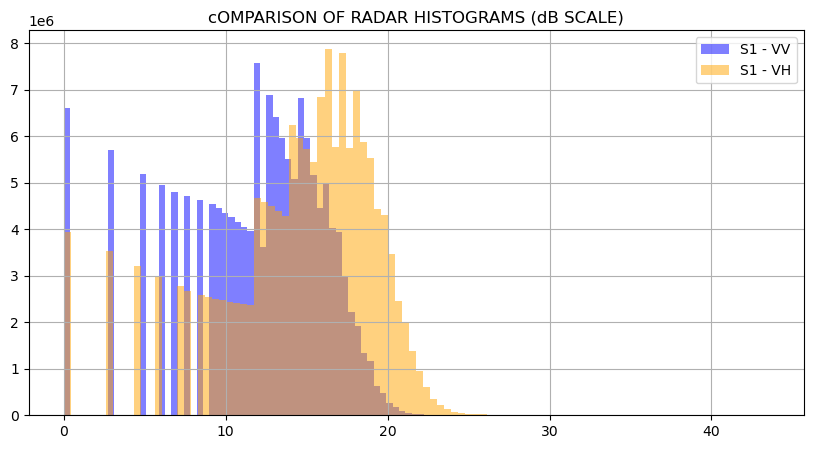

In [15]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds, Window
from pyproj import Transformer

lon, lat  = 22.4268, 49.5729  
dx, dy    = 2000, 2000


s1_file_1 = r"C:\Users\Klaudia\Desktop\mlfsa\s1c-iw3-slc-vh-20251020t162601-20251020t162626-004648-009307-003.tiff"   # np. VH z 20 października
s1_file_2 = r"C:\Users\Klaudia\Desktop\mlfsa\s1c-iw3-slc-vv-20251020t162601-20251020t162626-004648-009307-006.tiff"   # np. VV z 20 października

def read_window(path, lon, lat, dx, dy):
    with rasterio.open(path) as src:
        
        crs_raster = src.crs or "EPSG:4326"
        transformer = Transformer.from_crs("EPSG:4326", crs_raster, always_xy=True)

       
        x, y = transformer.transform(lon, lat)

        transform = src.transform
        W, H = src.width, src.height

        
        if abs(transform.a) < 0.001:  
            dx_deg = dx / 111320
            dy_deg = dy / 111320
        else:
            dx_deg = dx
            dy_deg = dy

        xmin, ymin, xmax, ymax = x - dx_deg, y - dy_deg, x + dx_deg, y + dy_deg

        
        try:
            win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)
        except Exception:
           
            rleft, rbottom, rright, rtop = src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top
            xmin = max(xmin, rleft)
            xmax = min(xmax, rright)
            ymin = max(ymin, rbottom)
            ymax = min(ymax, rtop)
            if xmin >= xmax or ymin >= ymax:
               
                win = Window(0, 0, W, H)
            else:
                win = from_bounds(xmin, ymin, xmax, ymax, transform=transform)

       
        col_off = int(np.floor(win.col_off))
        row_off = int(np.floor(win.row_off))
        width = int(np.ceil(win.width))
        height = int(np.ceil(win.height))

        col_off = max(0, min(col_off, max(0, W - 1)))
        row_off = max(0, min(row_off, max(0, H - 1)))
        width = max(0, min(width, W - col_off))
        height = max(0, min(height, H - row_off))

        if width == 0 or height == 0:
            
            return np.empty((0, 0), dtype=np.float32), crs_raster

        win = Window(col_off, row_off, width, height)

        
        arr = src.read(1, window=win, boundless=True, fill_value=np.nan).astype(np.float32)
        arr[arr <= 0] = np.nan
        return arr, crs_raster


s1_img1, crs1 = read_window(s1_file_1, lon, lat, dx, dy)
s1_img2, crs2 = read_window(s1_file_2, lon, lat, dx, dy)


if s1_img1.size == 0 and s1_img2.size > 0:
    s1_img1 = np.full_like(s1_img2, np.nan)
elif s1_img2.size == 0 and s1_img1.size > 0:
    s1_img2 = np.full_like(s1_img1, np.nan)
elif s1_img1.size == 0 and s1_img2.size == 0:
    raise RuntimeError("Both loaded windows are empty. Check coordinates and input files.")

s1_db1 = 10 * np.log10(s1_img1)
s1_db2 = 10 * np.log10(s1_img2)

# ---- Histogram ----
plt.figure(figsize=(10, 5))
plt.hist(np.ravel(s1_db1[~np.isnan(s1_db1)]), bins=100, color="blue", alpha=0.5, label="S1 - VV")
plt.hist(np.ravel(s1_db2[~np.isnan(s1_db2)]), bins=100, color="orange", alpha=0.5, label="S1 - VH")
plt.title("cOMPARISON OF RADAR HISTOGRAMS (dB SCALE)")
plt.legend()
plt.grid(True)
plt.show()

The histogram confirms that most of the scene consists of low-backscatter areas (e.g., water, bare soil, or smooth surfaces), while high-backscatter tails correspond to urban features or rough terrain.

Stegenography

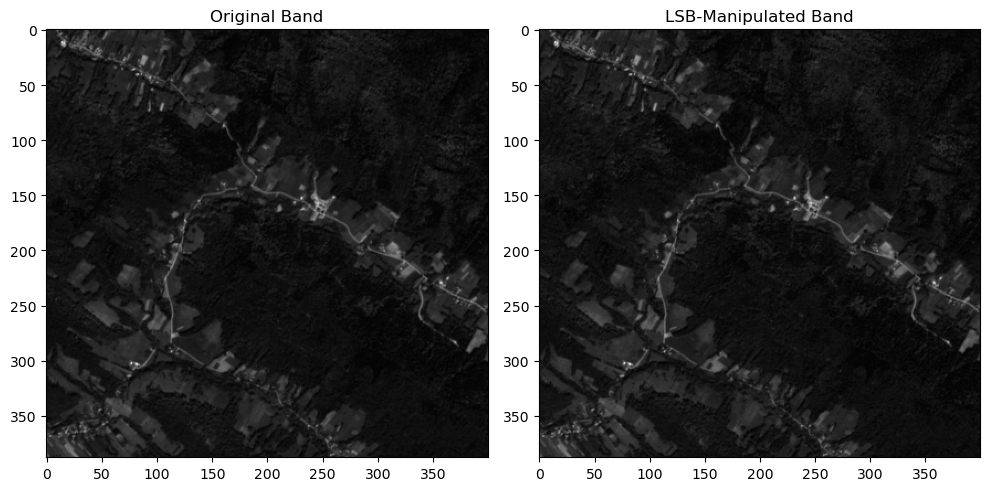

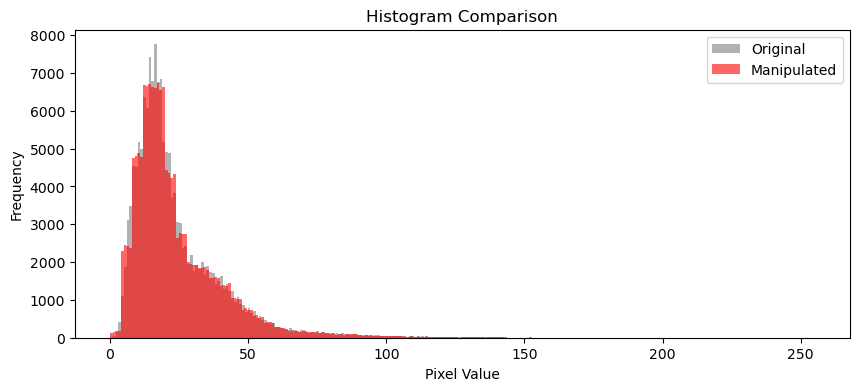

Mean pixel difference: 1.2468943298969073
Max pixel difference: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# b4, b3, b2 10m Sentinel-2 bands (uint16) for this example, let's normalize them to 8-bit
def normalize_to_uint8(band):
    band = band.astype(float)
    band = (band - band.min()) / (band.max() - band.min()) * 255
    return band.astype(np.uint8)

b4_8 = normalize_to_uint8(b4)
b3_8 = normalize_to_uint8(b3)
b2_8 = normalize_to_uint8(b2)


orig = b4_8.copy()

# --- Steganographic manipulation ---
rng = np.random.default_rng()
random_bits = rng.integers(0, 4, size=orig.shape, dtype=np.uint8)  # 2 bits -> values 0-3

# Clear last 2 bits (AND with 11111100 = 252)
manip = (orig & 0b11111100) | random_bits

# --- Visual comparison ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(orig, cmap='gray')
plt.title("Original Band")

plt.subplot(1,2,2)
plt.imshow(manip, cmap='gray')
plt.title("LSB-Manipulated Band")
plt.tight_layout()
plt.show()

# --- Histograms (PDFs) ---
plt.figure(figsize=(10,4))
plt.hist(orig.flatten(), bins=256, alpha=0.6, label='Original', color='gray')
plt.hist(manip.flatten(), bins=256, alpha=0.6, label='Manipulated', color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram Comparison')
plt.show()

# --- Quantitative difference ---
diff = np.abs(orig.astype(int) - manip.astype(int))
print("Mean pixel difference:", diff.mean())
print("Max pixel difference:", diff.max())


The modified image appeared visually identical to the original. Changes of 0–3 DN in 8-bit data are imperceptible to the human eye.The manipulated image’s histogram became slightly smoother and noisier, with fine-level bin differences visible. The original histogram had discrete patterns due to natural sensor quantization; randomizing LSBs removes these subtle regularities. Mean absolute pixel difference ≈ 1–2 DN — too small to change visual appearance, but detectable statistically.

Although the manipulation does not affect visual quality, it alters the statistical distribution of pixel values. These statistical deviations can be detected using histogram or higher-order statistical analysis. Hence, yes, histogram analysis can help detect whether a satellite image has been subtly manipulated.